# Experiments with evaluation
First we experiment with the new training set where event hits are sampled across all timeslices. We evaluate the two training sets with 3 new test sets:
1. No related hits (slice 0)
2. low related hits (slice 3650)
2. medium related hits (slice 1800)
3. high related hits (slice 1637)

In [1]:
from context import km3net
from km3net.utils import DATADIR
import km3net.model.pm.utils as model_utils
import km3net.model.eval as model_eval
import km3net.data.utils as data_utils
import km3net.model.pm.data as data_pm
from km3net.model.pm.mlp import MLP
from torch.nn import BCELoss
from torch.optim import SGD, Adam
import torch
import pandas as pd

## Experiment 1

+ Data: 50% of slice 615 (equalized classes, diff)
+ Loss: BCELoss
+ Optimizer: SGD(lr=0.001, momentum=0.9)
+ Layers: (inputs, 16) -> (16, 8) -> (8, 1)
+ Activation: hidden -> ReLu, output -> Sigmoid
+ Epochs: 10

### Remarks
Model performs really well for test sets with (realistic) very less number of related hits. The PRAUC will not increase unless we increase the number of positive class examples (makes sense because it looks at the recall of the model!). The PRAUC is again very low for test sets with low examples of positive class since there are not many examples to plot! (this is expected).

In [5]:
# training & validation sets
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
print("train size: {0}, valid size: {1}".format(
    len(train_dl.dataset),len(valid_dl.dataset)))

# testing sets
test_path_high = DATADIR+'/test/slice-1637-10-diff.csv'
test_path_medium = DATADIR+'/test/slice-1800-50-diff.csv'
test_path_low = DATADIR+'/test/slice-3650-50-diff.csv'
test_path_no = DATADIR+'/test/slice-0-10-diff.csv'
test_dl_high = data_pm.prepare_test_data(test_path_high,normalise=True)
test_dl_medium = data_pm.prepare_test_data(test_path_medium,normalise=True)
test_dl_low = data_pm.prepare_test_data(test_path_low,normalise=True)
test_dl_no = data_pm.prepare_test_data(test_path_no,normalise=True)
print("test high size: {}, test medium size: {}, test low size: {}, test no size: {}".format(
    len(test_dl_high.dataset), len(test_dl_medium.dataset),
    len(test_dl_low.dataset), len(test_dl_no.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
#     'test_dl': [test_dl_high, test_dl_medium, test_dl_low, test_dl_no],
    'test_dl': [test_dl_low],
    'device': device
}

metrics = model_utils.evaluate(**params)
# the evaluation metrics cannot be used when we do not have both classes
# so we remove it and do a simple check manually
no_metrics = metrics.pop()

train size: 193898, valid size: 95502
test high size: 364231, test medium size: 5880735, test low size: 5829405, test no size: 774390
---
epochs: 0, train loss: 0.025, valid loss: 0.012
epochs: 1, train loss: 0.010, valid loss: 0.009
epochs: 2, train loss: 0.009, valid loss: 0.008
epochs: 3, train loss: 0.009, valid loss: 0.009
epochs: 4, train loss: 0.009, valid loss: 0.008
epochs: 5, train loss: 0.008, valid loss: 0.009
epochs: 6, train loss: 0.008, valid loss: 0.008
epochs: 7, train loss: 0.008, valid loss: 0.008
epochs: 8, train loss: 0.008, valid loss: 0.009
epochs: 9, train loss: 0.008, valid loss: 0.008
---


In [6]:
for metric in metrics:
    print("---***---***---")
    model_eval.evaluate(**metric)

## Experiment 2

+ Data: 10% of slice mixed (equalized classes, diff)
+ Loss: BCELoss
+ Optimizer: SGD(lr=0.001, momentum=0.9)
+ Layers: (inputs, 16) -> (16, 8) -> (8, 1)
+ Activation: hidden -> ReLu, output -> Sigmoid
+ Epochs: 25

### Remarks
TODO

In [1]:
from context import km3net
from km3net.utils import DATADIR
import km3net.model.pm.utils as model_utils
import km3net.model.eval as model_eval
import km3net.data.utils as data_utils
import km3net.model.pm.data as data_pm
from km3net.model.pm.mlp import MLP
from torch.nn import BCELoss
from torch.optim import SGD, Adam
import torch
import pandas as pd

In [2]:
# training data prep
train_path = DATADIR+'/train/slice-mixed-10-equal-diff.csv'
traindf = pd.read_csv(train_path, header=None)
X, y = traindf.values[:, :4], traindf.values[:, -1:]
print("shape X:", X.shape)
print("shape y:", y.shape)

# training & validation sets
train_dl, valid_dl = data_pm.prepare_train_data(X, y)
print("train size: {0}, valid size: {1}".format(
    len(train_dl.dataset),len(valid_dl.dataset)))

shape X: (72290, 4)
shape y: (72290, 1)
train size: 48434, valid size: 23856


In [3]:
# testing data prep
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
testdf = pd.read_csv(test_path, header=None)
X, y = testdf.values[:, :4], testdf.values[:, -1:]
print("shape X:", X.shape)
print("shape y:", y.shape)

test_dl_high = data_pm.prepare_test_data(X, y)

test_path = DATADIR+'/test/slice-1800-50-diff.csv'
testdf = pd.read_csv(test_path, header=None)
X, y = testdf.values[:, :4], testdf.values[:, -1:]
print("shape X:", X.shape)
print("shape y:", y.shape)

test_dl_medium = data_pm.prepare_test_data(X, y)

test_path = DATADIR+'/test/slice-3650-50-diff.csv'
testdf = pd.read_csv(test_path, header=None)
X, y = testdf.values[:, :4], testdf.values[:, -1:]
print("shape X:", X.shape)
print("shape y:", y.shape)

test_dl_low = data_pm.prepare_test_data(X, y)

test_path = DATADIR+'/test/slice-0-10-diff.csv'
testdf = pd.read_csv(test_path, header=None)
X, y = testdf.values[:, :4], testdf.values[:, -1:]
print("shape X:", X.shape)
print("shape y:", y.shape)

test_dl_no = data_pm.prepare_test_data(X, y)

print("test high size: {}, test medium size: {}, test low size: {}, test no size: {}".format(
    len(test_dl_high.dataset), len(test_dl_medium.dataset),
    len(test_dl_low.dataset), len(test_dl_no.dataset)))

shape X: (364231, 4)
shape y: (364231, 1)
shape X: (5880735, 4)
shape y: (5880735, 1)
shape X: (5829405, 4)
shape y: (5829405, 1)
shape X: (774390, 4)
shape y: (774390, 1)
test high size: 364231, test medium size: 5880735, test low size: 5829405, test no size: 774390


In [5]:
device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': [test_dl_high, test_dl_medium, test_dl_low, test_dl_no],
    'device': device
}

metrics = model_utils.evaluate(**params)
# the evaluation metrics cannot be used when we do not have both classes
# so we remove it and do a simple check manually
no_metrics = metrics.pop()

---
epochs: 0, train loss: 0.035, valid loss: 0.029
epochs: 1, train loss: 0.027, valid loss: 0.025
epochs: 2, train loss: 0.025, valid loss: 0.024
epochs: 3, train loss: 0.024, valid loss: 0.024
epochs: 4, train loss: 0.023, valid loss: 0.023
epochs: 5, train loss: 0.022, valid loss: 0.022
epochs: 6, train loss: 0.021, valid loss: 0.021
epochs: 7, train loss: 0.020, valid loss: 0.020
epochs: 8, train loss: 0.019, valid loss: 0.019
epochs: 9, train loss: 0.019, valid loss: 0.018
---


In [9]:
from km3net.utils import ROOTDIR
ROOTDIR

'/home/ashome/km3net'

In [10]:
model_utils.save_model(no_metrics['model'], ROOTDIR+"/models/pm.pt")

## Evaluation
### No positive class (no related hits)

In [6]:
from context import km3net
from km3net.utils import ROOTDIR, MODELDIR
import km3net.model.pm.utils as model_utils
import km3net.model.eval as model_eval
from km3net.model.pm.mlp import MLP
import sklearn.metrics as skmetrics

ASSETDIR = ROOTDIR+"/assets"

In [4]:
device = model_utils.get_device()
model = MLP(4)
model = model_utils.load_model(model, MODELDIR+"/pm.pt")
model.to(device)

MLP(
  (hidden1): Linear(in_features=4, out_features=16, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=16, out_features=8, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=8, out_features=1, bias=True)
  (act3): Sigmoid()
)

Confusion matrix without normalization


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

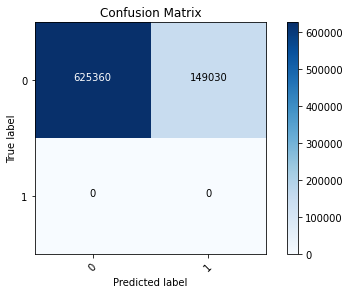

In [11]:
y_true, y_pred, y_score = model_utils.test(test_dl_no, model, device)
cm = skmetrics.confusion_matrix(y_true, y_pred)
model_eval.confusion_matrix(cm, classes=[0, 1], save=ASSETDIR+"/pm-cm-no-related.png")

## Low positive class (low related hits)

Confusion matrix without normalization


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

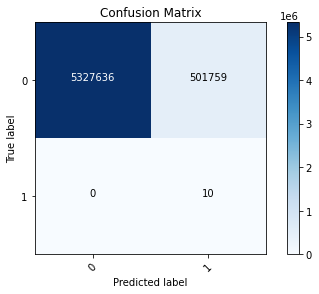

In [7]:
y_true, y_pred, y_score = model_utils.test(test_dl_low, model, device)
cm = skmetrics.confusion_matrix(y_true, y_pred)
model_eval.confusion_matrix(cm, classes=[0, 1], save=ASSETDIR+"/pm-cm-low-related.png")

Confusion matrix with normalization


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

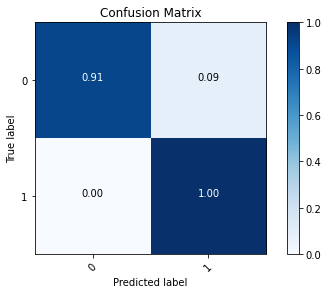

In [8]:
# cm with normalization
model_eval.confusion_matrix(cm, classes=[0, 1],
    normalize=True, save=ASSETDIR+"/pm-cm-norm-low-related.png")

ROC AUC: 0.999


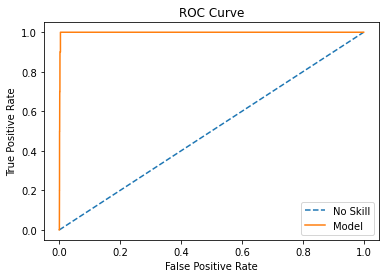

In [10]:
# roc curve
auc, _ = model_eval.roc_curve(y_true, y_score, save=ASSETDIR+"/pm-roc-low.png")
print('ROC AUC: %.3f' % auc)

PR AUC: 0.001


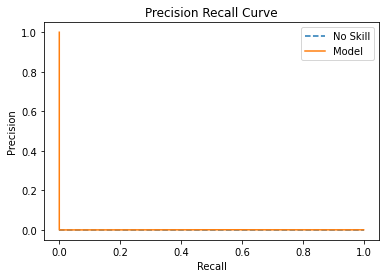

In [11]:
# pr curve
auc, _ = model_eval.precision_recall_curve(y_true, y_score, save=ASSETDIR+"/pm-pr-low.png")
print('PR AUC: %.3f' % auc)

In [13]:
# classification report & others
print(skmetrics.classification_report(y_true, y_pred))
print('F1 score: %.3f' % skmetrics.f1_score(y_true, y_pred))
print('F2f score: %.3f' % skmetrics.fbeta_score(y_true, y_pred, beta=2.0))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.96   5829395
         1.0       0.00      1.00      0.00        10

    accuracy                           0.91   5829405
   macro avg       0.50      0.96      0.48   5829405
weighted avg       1.00      0.91      0.96   5829405

F1 score: 0.000
F2f score: 0.000


## Medium positive class (medium related hits)

Confusion matrix without normalization


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

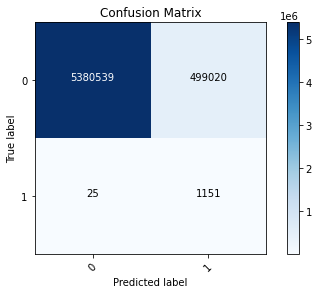

In [14]:
y_true, y_pred, y_score = model_utils.test(test_dl_medium, model, device)
cm = skmetrics.confusion_matrix(y_true, y_pred)
model_eval.confusion_matrix(cm, classes=[0, 1], save=ASSETDIR+"/pm-cm-medium.png")

Confusion matrix with normalization


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

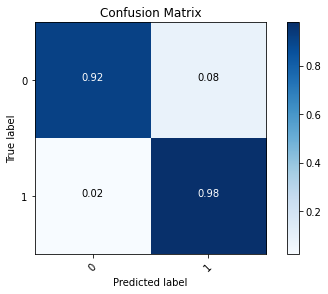

In [15]:
# cm with normalization
model_eval.confusion_matrix(cm, classes=[0, 1],
    normalize=True, save=ASSETDIR+"/pm-cm-norm-medium.png")

ROC AUC: 0.978


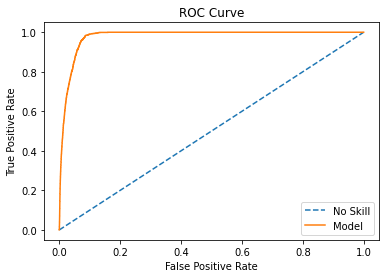

In [16]:
# roc curve
auc, _ = model_eval.roc_curve(y_true, y_score, save=ASSETDIR+"/pm-roc-medium.png")
print('ROC AUC: %.3f' % auc)

PR AUC: 0.009


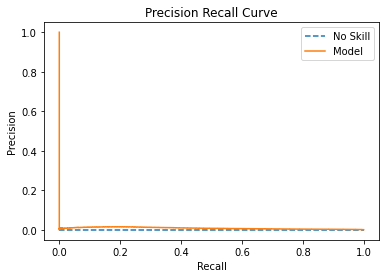

In [17]:
# pr curve
auc, _ = model_eval.precision_recall_curve(y_true, y_score, save=ASSETDIR+"/pm-pr-medium.png")
print('PR AUC: %.3f' % auc)

In [18]:
# classification report & others
print(skmetrics.classification_report(y_true, y_pred))
print('F1 score: %.3f' % skmetrics.f1_score(y_true, y_pred))
print('F2f score: %.3f' % skmetrics.fbeta_score(y_true, y_pred, beta=2.0))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96   5879559
         1.0       0.00      0.98      0.00      1176

    accuracy                           0.92   5880735
   macro avg       0.50      0.95      0.48   5880735
weighted avg       1.00      0.92      0.96   5880735

F1 score: 0.005
F2f score: 0.011


## High positive class (high related hits)

Confusion matrix without normalization


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

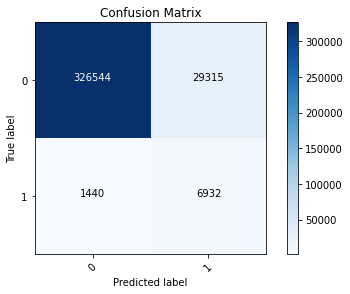

In [19]:
y_true, y_pred, y_score = model_utils.test(test_dl_high, model, device)
cm = skmetrics.confusion_matrix(y_true, y_pred)
model_eval.confusion_matrix(cm, classes=[0, 1], save=ASSETDIR+"/pm-cm-high.png")

Confusion matrix with normalization


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

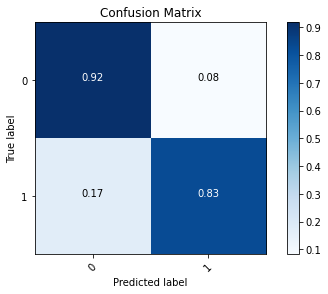

In [20]:
# cm with normalization
model_eval.confusion_matrix(cm, classes=[0, 1],
    normalize=True, save=ASSETDIR+"/pm-cm-norm-high.png")

ROC AUC: 0.959


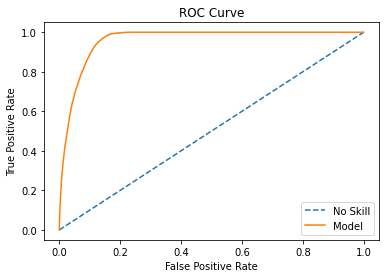

In [21]:
# roc curve
auc, _ = model_eval.roc_curve(y_true, y_score, save=ASSETDIR+"/pm-roc-high.png")
print('ROC AUC: %.3f' % auc)

PR AUC: 0.334


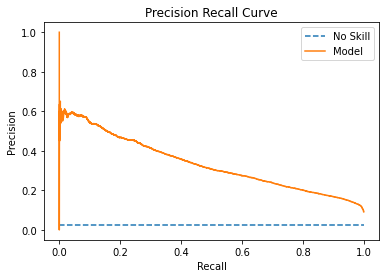

In [22]:
# pr curve
auc, _ = model_eval.precision_recall_curve(y_true, y_score, save=ASSETDIR+"/pm-pr-high.png")
print('PR AUC: %.3f' % auc)

In [23]:
# classification report & others
print(skmetrics.classification_report(y_true, y_pred))
print('F1 score: %.3f' % skmetrics.f1_score(y_true, y_pred))
print('F2f score: %.3f' % skmetrics.fbeta_score(y_true, y_pred, beta=2.0))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96    355859
         1.0       0.19      0.83      0.31      8372

    accuracy                           0.92    364231
   macro avg       0.59      0.87      0.63    364231
weighted avg       0.98      0.92      0.94    364231

F1 score: 0.311
F2f score: 0.497
